In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/content/drive/MyDrive/HousePrices/input/H_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## **Preprocesing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


***Categorical Variables***

In [8]:
from scipy.stats import f_oneway

categorical_columns = df.select_dtypes(include=['object']).columns

anova_results = []

for column in categorical_columns:
    data = df[[column, 'SalePrice']].dropna()

    groups = [data[data[column] == category]['SalePrice'] for category in data[column].unique()]

    f_stat, p_value = f_oneway(*groups)

    anova_results.append({
        'Column': column,
        'F-Statistic': f_stat,
        'P-Value': p_value
    })

anova_df = pd.DataFrame(anova_results)

anova_df = anova_df.sort_values(by='F-Statistic', ascending=False)

print("ANOVA Results for Categorical Variables:")
print(anova_df)

ANOVA Results for Categorical Variables:
           Column  F-Statistic        P-Value
18      ExterQual   443.334831  1.439551e-204
30    KitchenQual   407.806352  3.032213e-192
21       BsmtQual   392.913506  9.610615e-186
34   GarageFinish   250.962467   1.199117e-93
20     Foundation   100.253851   5.791895e-91
28     CentralAir    98.305344   1.809506e-22
27      HeatingQC    88.394462   2.667062e-67
8    Neighborhood    71.784865  1.558600e-225
33     GarageType    71.522123   1.247154e-66
23   BsmtExposure    70.887984   1.022671e-42
24   BsmtFinType1    67.602175   1.807731e-63
42  SaleCondition    45.578428   7.988268e-44
0        MSZoning    43.840282   8.817634e-35
37     PavedDrive    42.024179   1.803569e-18
3        LotShape    40.132852   6.447524e-25
2           Alley    35.562060   4.899826e-08
17     MasVnrType    30.746119   2.010580e-13
41       SaleType    28.863054   5.039767e-42
32    FireplaceQu    24.398929   5.016300e-19
29     Electrical    23.067673   1.6632

***Numeric Variables***

In [13]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_data = df[numeric_columns]

correlation_matrix = numeric_data.corr()

target_correlation = correlation_matrix["SalePrice"].sort_values(ascending=False)
print("\nCorrelation with SalePrice:")
print(target_correlation)


Correlation with SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAb

## **Modeling**

In [34]:
select_features = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
                   'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'Foundation', 'CentralAir', 'HeatingQC', 'Neighborhood', 'GarageType', 'BsmtExposure']]
X = select_features
X = pd.get_dummies(X, drop_first=True)
y = df["SalePrice"]
y = y.values.reshape(-1, 1)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1460, 63)
Shape of y: (1460, 1)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 63), (292, 63), (1168, 1), (292, 1))

In [36]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(36, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

In [40]:
output = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37198942208.0000
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38150340608.0000
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38833328128.0000
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38044205056.0000
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36460003328.0000
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38196019200.0000
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38084960256.0000
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38272016384.0000
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36273459200.0000
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35371692032.0000
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37453303808.0000
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37001383936.0000
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36549255168.0000
Epoch 14

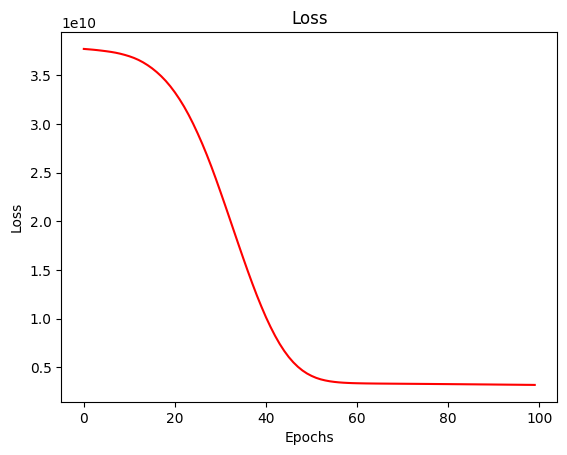

In [41]:
plt.plot(output.history['loss'], c="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

Evaluate your trained model on validation data (You should achieve an loss < $50000)

In [43]:
loss = model.evaluate(X_train, y_train)
loss

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3198232576.0000


3185977088.0

Predict myown house price with your trained model

In [44]:
my_house = {
    'OverallQual': [8],  # کیفیت کلی
    'GrLivArea': [2500],  # مساحت فضای زندگی بالای زمین (فوت مربع)
    'GarageCars': [2],  # تعداد ماشین‌هایی که گاراژ جا می‌شود
    'GarageArea': [500],  # مساحت گاراژ
    'TotalBsmtSF': [800],  # مساحت زیرزمین
    '1stFlrSF': [1200],  # مساحت طبقه اول
    'FullBath': [2],  # تعداد حمام کامل
    'TotRmsAbvGrd': [8],  # تعداد کل اتاق‌ها بالای زمین
    'YearBuilt': [2008],  # سال ساخت خانه
    'YearRemodAdd': [2023],  # سال بازسازی
    'ExterQual': ['Gd'],  # کیفیت بیرونی (دسته‌ای)
    'KitchenQual': ['Ex'],  # کیفیت آشپزخانه (دسته‌ای)
    'BsmtQual': ['Gd'],  # کیفیت زیرزمین (دسته‌ای)
    'GarageFinish': ['Fin'],  # وضعیت نهایی گاراژ (دسته‌ای)
    'Foundation': ['PConc'],  # نوع فونداسیون (دسته‌ای)
    'CentralAir': ['Y'],  # آیا سیستم تهویه مرکزی دارد؟ (دسته‌ای)
    'HeatingQC': ['Ex'],  # کیفیت سیستم گرمایش (دسته‌ای)
    'Neighborhood': ['NridgHt'],  # محله (دسته‌ای)
    'GarageType': ['Attchd'],  # نوع گاراژ (دسته‌ای)
    'BsmtExposure': ['No']  # نورگیری زیرزمین (دسته‌ای)
}

house_df = pd.DataFrame(my_house)

In [47]:
# One-Hot Encoding
house_df_encoded = pd.get_dummies(house_df, drop_first=True)

X = pd.get_dummies(select_features, drop_first=True)
missing_cols = set(X.columns) - set(house_df_encoded.columns)
for col in missing_cols:
    house_df_encoded[col] = 0

house_df_encoded = house_df_encoded[X.columns]

In [48]:
predicted_price = model.predict(house_df_encoded)
print(f"Predicted Price for the House: ${predicted_price[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Price for the House: $203,220.56


## Test Model
---

Save your trained model as a *.h5 extension file


In [50]:
model.save("/content/drive/MyDrive/HousePrices/output/model.h5")

In [52]:
data = pd.read_csv('/content/drive/MyDrive/HousePrices/input/H_test.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
select_features = data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
                   'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'Foundation', 'CentralAir', 'HeatingQC', 'Neighborhood', 'GarageType', 'BsmtExposure']]
X = select_features
X = pd.get_dummies(X, drop_first=True)
print("Shape of X:", X.shape)

Shape of X: (1459, 63)


In [55]:
Prediction = np.array(model.predict(X)).reshape(-1,)
Prediction = pd.DataFrame({'SalePrice':pd.Series(Prediction, index=data['Id'])})
Prediction.head()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,SalePrice
Id,
1461,163917.703125
1462,185057.296875
1463,178944.406250
1464,178029.125000
1465,187810.890625


In [56]:
Prediction.to_csv('/content/drive/MyDrive/HousePrices/output/H_test_prediction.csv')